# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import norm
from scipy import stats
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [42]:
medical.shape

(1338, 8)

In [43]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [44]:
medical.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ mean: 13270.422265141257, std: 12110.011236693996

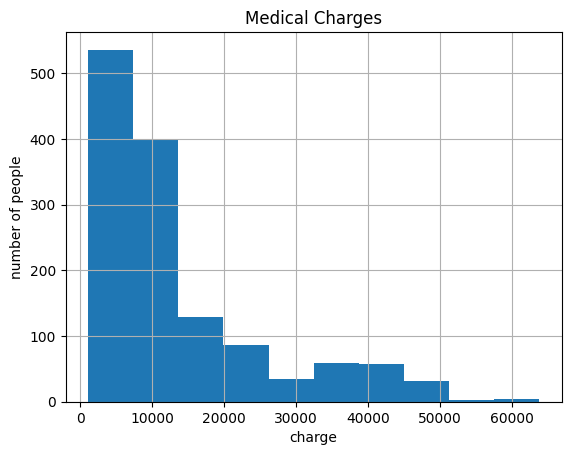

In [45]:
medical['charges'].hist(bins=10)
_ = plt.xlabel('charge')
_ = plt.ylabel('number of people')
_ = plt.title('Medical Charges')

In [64]:
sample_mean = np.mean(medical['charges'])
sample_std = np.std(medical['charges'])
print(sample_mean, sample_std)

13270.422265141257 12105.484975561605


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ If the data is a random representation of hospital charges, the average charge is actually above $12,000 ($13,270). This sample mean is an unbiased estimator of the population mean

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ I believe this would be a one-sided interval as we are interested in knowing if our calculated population mean is above or below 12,000 as claimed by the administrator. Is this correct?

Student note: since our sample random data represents the population and our sample size is big enough, I am using the z-value

In [65]:
critical_value = norm.ppf(0.95)
z_score_95 = np.round(critical_value, decimals=2)
sample_size = len(medical)
margin_of_error = z_score_95 * (sample_std / np.sqrt(sample_size))
confidence_interval_lower = sample_mean - margin_of_error
confidence_interval_upper =  sample_mean + margin_of_error
print(margin_of_error, confidence_interval_lower, confidence_interval_upper)

542.7476908059778 12727.674574335279 13813.169955947234


Student answer: Our calculated mean of $13270.42 is above the 12,000 threashold as claimed by the administrator. This is within the 95% confidence interval of (12727.67, 13813.16)

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ We are assuming that the variances of the two groups are equal

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ I am getting a different t-value on manual calculation which is 13.30 which on scipy stats, I get a t-value of 11.89. Could you give remarks on how to get the p-value manually given the t-value? On scipy status, I get a p-value of 4.46

In [48]:
insured = medical[medical['insuranceclaim'] == 1]
uninsured = medical[medical['insuranceclaim'] == 0]
print(insured.shape, uninsured.shape)

(783, 8) (555, 8)


In [56]:
insuredstd = insured['charges'].std()
uninsuredstd = uninsured['charges'].std()
#insuredstd = np.std(insured['charges'])
#uninsuredstd = np.std(uninsured['charges'])

insuredn = len(insured)
uninsuredn = len(uninsured)
print(insuredn, uninsuredn, insuredstd, uninsuredstd)

pooled_standard_deviation = np.sqrt(
                      ((insuredn - 1) * insuredstd ** 2 +
                       (uninsuredn - 1) * uninsuredstd ** 2) 
                        / 
                        (insuredn + uninsuredn -2))

print("Pooled Standard Deviation = ", pooled_standard_deviation)

783 555 14045.928418802128 6446.510126811737
Pooled Standard Deviation =  11520.034268775256


In [63]:
insuredmean = insured['charges'].mean()
uninsuredmean = uninsured['charges'].mean()
insuredvar = insured['charges'].var()
uninsuredvar = uninsured['charges'].var()
print(insuredmean, uninsuredmean, insuredvar, uninsuredvar)

#Student note: the equation above is different from what I see when I research this topic? I also find a totally different value
#t_manual = (insuredmean - uninsuredmean) / np.sqrt((1/insuredn) + (1/uninsuredn))
t_manual = (insuredmean - uninsuredmean) / np.sqrt((insuredvar / insuredn) + (uninsuredvar / uninsuredn))
print("t-statistic manual = ", t_manual)

16423.928276537677 8821.421892306305 197288105.14611325 41557492.815086275
t-statistic manual =  13.29803195797565


In [59]:
t_statistic, p_value = stats.ttest_ind(insured['charges'], uninsured['charges'])
print("t-statistic from stats = ", t_statistic, "p-value from stats = ", p_value)

t-statistic from stats =  11.893299030876712 p-value from stats =  4.461230231620717e-31


In [54]:
stats.ttest_ind?

Signature:
stats.ttest_ind(
    a,
    b,
    *,
    axis=0,
    equal_var=True,
    nan_policy='propagate',
    permutations=None,
    random_state=None,
    alternative='two-sided',
    trim=0,
    method=None,
    keepdims=False,
)
Docstring:
Calculate the T-test for the means of *two independent* samples of scores.

This is a test for the null hypothesis that 2 independent samples
have identical average (expected) values. This test assumes that the
populations have identical variances by default.

.. deprecated:: 1.17.0
    Use of argument(s) ``{'alternative', 'trim', 'nan_policy', 'method', 'equal_var', 'axis', 'keepdims'}`` by position is deprecated; beginning in 
    SciPy 1.17.0, these will be keyword-only. Argument(s) ``{'random_state', 'permutations'}`` are deprecated, whether passed by position or keyword; they will be removed in SciPy 1.17.0. Use ``method`` to perform a permutation test.

Parameters
----------
a, b : array_like
    The arrays must have the same shape, excep

In [60]:
stats?

Type:        module
String form: <module 'scipy.stats' from '/opt/anaconda3/lib/python3.13/site-packages/scipy/stats/__init__.py'>
File:        /opt/anaconda3/lib/python3.13/site-packages/scipy/stats/__init__.py
Docstring:  
.. _statsrefmanual:

Statistical functions (:mod:`scipy.stats`)

.. currentmodule:: scipy.stats

This module contains a large number of probability distributions,
summary and frequency statistics, correlation functions and statistical
tests, masked statistics, kernel density estimation, quasi-Monte Carlo
functionality, and more.

Statistics is a very large area, and there are topics that are out of scope
for SciPy and are covered by other packages. Some of the most important ones
are:

- `statsmodels <https://www.statsmodels.org/stable/index.html>`__:
  regression, linear models, time series analysis, extensions to topics
  also covered by ``scipy.stats``.
- `Pandas <https://pandas.pydata.org/>`__: tabular data, time series
  functionality, interfaces to other stat

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ Looks like there is zscore() and weightstats.ztest()

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test